<a href="https://colab.research.google.com/github/ranasweta/AI_Project_4th_Sem/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pandas numpy tensorflow scikit-learn matplotlib seaborn imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE



In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
if df.isnull().sum().sum() > 0:
    print("Warning: Dataset contains missing values!")

In [ ]:
df['Class'].fillna(df['Class'].mean(), inplace=True)

In [ ]:
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

In [ ]:
if 'Time' in df.columns:
    df.drop("Time", axis=1, inplace=True)
else:
    print("Column 'Time' not found in DataFrame.")

Column 'Time' not found in DataFrame.


In [ ]:
df['Class'] = df['Class'].astype(int)


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Impute missing values using SimpleImputer before applying SMOTE
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now apply SMOTE
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Output layer (binary classification)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9049 - loss: 0.2262 - val_accuracy: 0.9983 - val_loss: 0.0117
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9969 - loss: 0.0147 - val_accuracy: 0.9971 - val_loss: 0.0085
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9982 - loss: 0.0079 - val_accuracy: 0.9987 - val_loss: 0.0065
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0053 - val_accuracy: 0.9988 - val_loss: 0.0056
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9992 - val_loss: 0.0053
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9988 - val_loss: 0.0063
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9987 - val_loss: 0.0068
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

🔹 Accuracy: 0.9988
🔹 Precision: 0.7727
🔹 Recall: 0.8947
🔹 F1 Score: 0.8293


In [ ]:
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5941
           1       0.77      0.89      0.83        19

    accuracy                           1.00      5960
   macro avg       0.89      0.95      0.91      5960
weighted avg       1.00      1.00      1.00      5960



In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


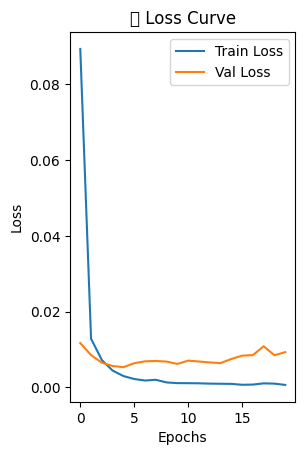

In [ ]:
# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("📉 Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


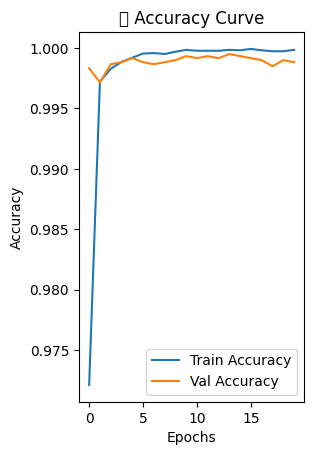

In [ ]:
# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("📈 Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()